# Packages and OS

In [34]:
%load_ext autoreload
%autoreload 2

# generic packages
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm.auto import tqdm
from datetime import datetime
import pandas as pd
import seaborn as sns
import copy


# # os directory
YOUR_FOLDER_DIRECTORY = os.getcwd()

# Assuming 'src' directory is located one level above the notebook directory
project_directory = os.path.join(YOUR_FOLDER_DIRECTORY, '..')
sys.path.append(project_directory)

# src code
from src.portfolio_class_240309 import Portfolio

from src.config import (

    TICKERS,
    START_DATE,
    END_DATE,
    INTERVAL,
    RISK_FREE_RATE,
    MSCI_SCORE_ALREADY_DOWNLOADED,
    FREQUENCY_RETURNS
)
from src.backtesting_score import (

    get_last_esg_scores,
    get_first_date_with_all_msci_score_available,
    retrieve_last_esg_date
)

from src.controverse_score import (

    get_new_esg_score_min_method,
    get_new_esg_score_proba_method,
    boostrap_method_effect,
    compute_mean_over_controverse,
    compute_new_esg_score_with_method,
    change_msci_score_with_controverse
)
# scraper code
from exploration.scrapper.scraper import (
    download_msci_esg_ratings_htmlfile,
    load_dict_from_json
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Download MSCI data

In [35]:
if MSCI_SCORE_ALREADY_DOWNLOADED:
    # load data
    msci_score = load_dict_from_json("/Users/elbezaharon/PA3A project/exemple_msci_esg_ratings_numeric.json")
else:
    # scrap data
    msci_score={}
    for ticker in tqdm(TICKERS):
        dict = download_msci_esg_ratings_htmlfile(tickers=[ticker])
        msci_score[ticker] = dict[ticker]

    for ticker in msci_score.keys():
        for key, rating in msci_score[ticker]['esg_score_dict'].items():
            key = datetime.strptime(key, '%b-%y').strftime('%Y-%m-%d')
    # # save data
    # from src.config import save_dict_to_json
    # save_dict_to_json(msci_score, "../data/exemple_msci_esg_ratings_numeric.json")
    # MSCI_SCORE_ALREADY_DOWNLOADED=True


# Method min

In [36]:
get_new_esg_score_min_method(esg_score=30, controverse_score=2.5)

29.907723038442686

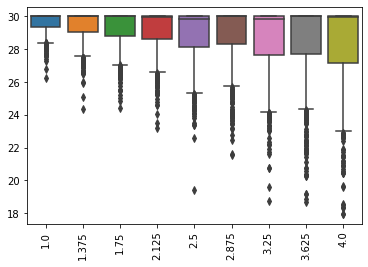

In [37]:
boostrap_method_effect(esg_score=30, method_function = get_new_esg_score_min_method, nb_boostrap=1000)

# Method probabilistic

In [38]:
get_new_esg_score_proba_method(esg_score=30, controverse_score=2.5)

28.382083917144644

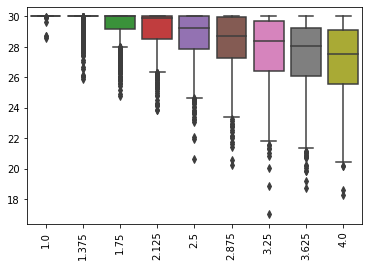

In [39]:
boostrap_method_effect(esg_score=30, method_function = get_new_esg_score_proba_method, nb_boostrap=1000)

# Computation on dataset

In [40]:
END_DATE = '2022-12-01'

dict_color_to_variance = {
    'Red': 4,
    'Orange':3,
    'Yellow':2,
    'Green':1
}

In [41]:
compute_new_esg_score_with_method(msci_score=msci_score, 
                                  end_date=END_DATE, 
                                  dict_color_to_variance=dict_color_to_variance, 
                                  method=get_new_esg_score_min_method)


,ticker,esg_score,controverse_score,esg_score_new
0,AMZN,50,2.333333,49.204836
1,TSLA,64,2.000000,64.000000
2,WMT,50,2.333333,50.000000
3,DIS,64,2.000000,64.000000
4,F,7,1.000000,5.569779
5,PG,36,2.666667,34.634532
6,COST,64,1.333333,64.000000
7,KO,48,2.333333,44.543206
8,PEP,79,2.000000,79.000000
9,XOM,50,2.666667,49.901759


In [42]:
compute_new_esg_score_with_method(msci_score=msci_score, 
                                  end_date=END_DATE, 
                                  dict_color_to_variance=dict_color_to_variance,
                                  method=get_new_esg_score_proba_method)

,ticker,esg_score,controverse_score,esg_score_new
0,AMZN,50,2.333333,47.810426
1,TSLA,64,2.000000,64.000000
2,WMT,50,2.333333,47.180266
3,DIS,64,2.000000,61.196562
4,F,7,1.000000,7.000000
5,PG,36,2.666667,32.743987
6,COST,64,1.333333,64.000000
7,KO,48,2.333333,48.000000
8,PEP,79,2.000000,79.000000
9,XOM,50,2.666667,50.000000


Pour aller plus loin peut être faire une méthode probabilistique sur chacun des scores E, S et G

In [43]:
msci_score_with_controverse = change_msci_score_with_controverse(msci_score=msci_score, 
                                                        end_date=END_DATE, 
                                                        dict_color_to_variance=dict_color_to_variance,  
                                                        method=get_new_esg_score_min_method)
msci_score_with_controverse

{'AMZN': {'esg_score_dict': {'2020-04-01': 50,
   '2020-12-01': 50,
   '2021-12-01': 47.89743562793462,
   '2022-12-01': 64,
   '2023-08-01': 50},
  'industry_scores_dict': {'CCC': 0.01,
   'B': 0.03,
   'BB': 0.07,
   'BBB': 0.13,
   'A': 0.32,
   'AA': 0.36,
   'AAA': 0.07},
  'industry': 'retail - consumer discretionary industry',
  'controversy_info': {'Environment': 'Yellow',
   'Social': 'Orange',
   'Governance': 'Yellow'}},
 'TSLA': {'esg_score_dict': {'2020-04-01': 64,
   '2021-05-01': 64,
   '2021-12-01': 64,
   '2022-05-01': 61.650286551268366,
   '2023-07-01': 64},
  'industry_scores_dict': {'CCC': 0.04,
   'B': 0.2,
   'BB': 0.14,
   'BBB': 0.12,
   'A': 0.31,
   'AA': 0.12,
   'AAA': 0.08},
  'industry': 'automobiles industry',
  'controversy_info': {'Environment': 'Green',
   'Social': 'Orange',
   'Governance': 'Yellow'}},
 'WMT': {'esg_score_dict': {'2020-06-01': 50,
   '2020-12-01': 36,
   '2021-09-01': 50,
   '2022-10-01': 50.0,
   '2023-12-01': 50},
  'industry_scor

# 1. Get optimal weights under constraints

In [44]:
END_DATE = '2022-12-01'

if datetime.strptime(END_DATE, '%Y-%m-%d') < get_first_date_with_all_msci_score_available(msci_score):
    print("ERROR: END_DATE is before the first date with all msci score available.")
    END_DATE = get_first_date_with_all_msci_score_available(msci_score)
    print(f"END_DATE is now {END_DATE}, but you can change it.")
else:
    print("Thanks for having entered a valid end date !")

Thanks for having entered a valid end date !


In [45]:
msci_last_esg_score = get_last_esg_scores(msci_score, END_DATE)

PORTFOLIO = Portfolio(TICKERS,
                      START_DATE,
                      END_DATE,
                      INTERVAL,
                      msci_last_esg_score,
                      FREQUENCY_RETURNS)

PORTFOLIO.download_data()

msci_last_esg_score_with_controverse = get_last_esg_scores(msci_score_with_controverse, END_DATE)

PORTFOLIO_WITH_CONTROVERSE = Portfolio(TICKERS,
                      START_DATE,
                      END_DATE,
                      INTERVAL,
                      msci_last_esg_score_with_controverse,
                      FREQUENCY_RETURNS)

PORTFOLIO_WITH_CONTROVERSE.download_data()


[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed


In [46]:
MAX_ESG_SCORE = 60
MAX_ESG_SCORES = list(np.linspace(np.min(msci_last_esg_score), np.max(msci_last_esg_score), 30))
GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter


## 1.1. Market optimum

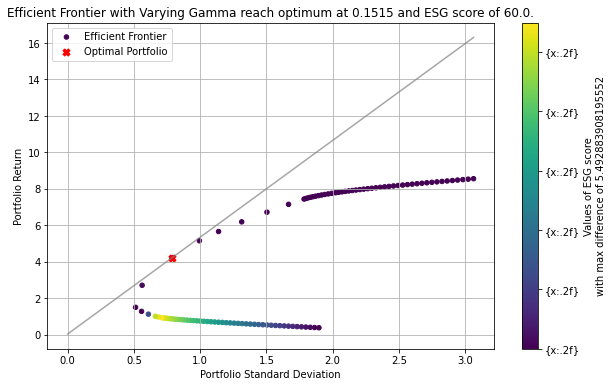

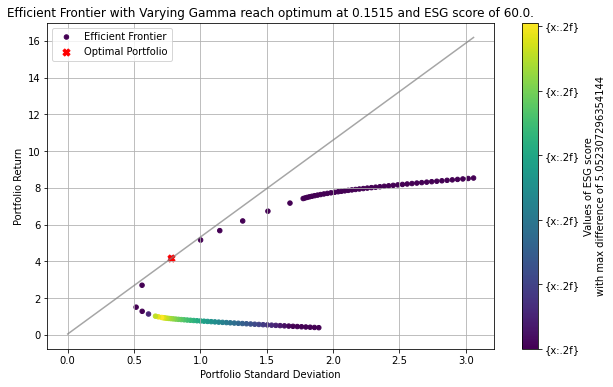

In [51]:
PORTFOLIO.plot_efficient_frontier(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True)

PORTFOLIO_WITH_CONTROVERSE.plot_efficient_frontier(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True)


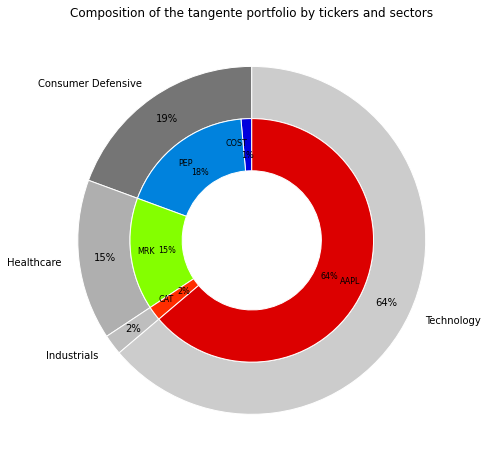

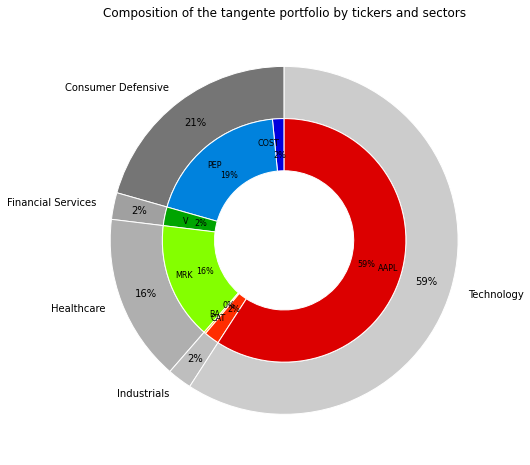

In [52]:
PORTFOLIO.plot_tangente_portfolio_composition(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True)

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True)

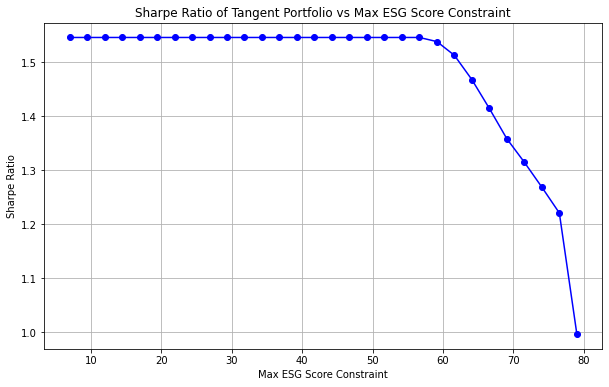

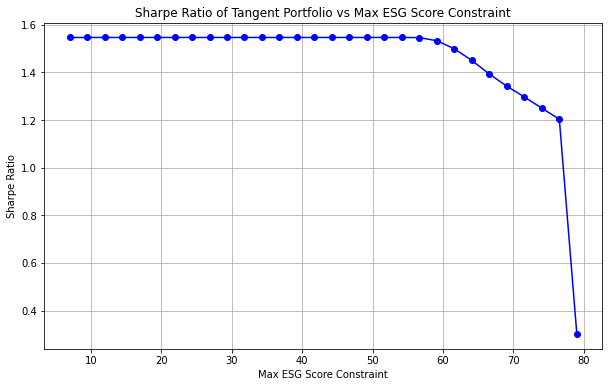

In [53]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=1,
                                        best_in_class_strategy='global')

PORTFOLIO_WITH_CONTROVERSE.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=1,
                                        best_in_class_strategy='global')


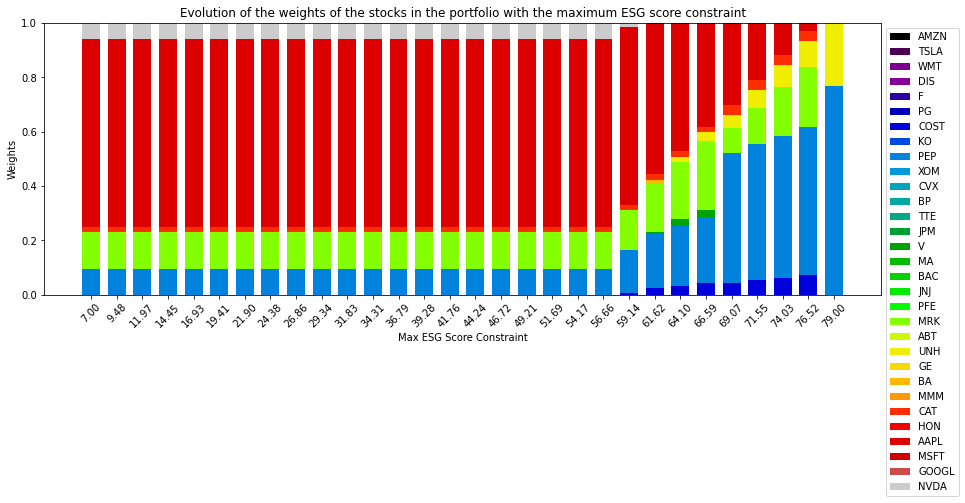

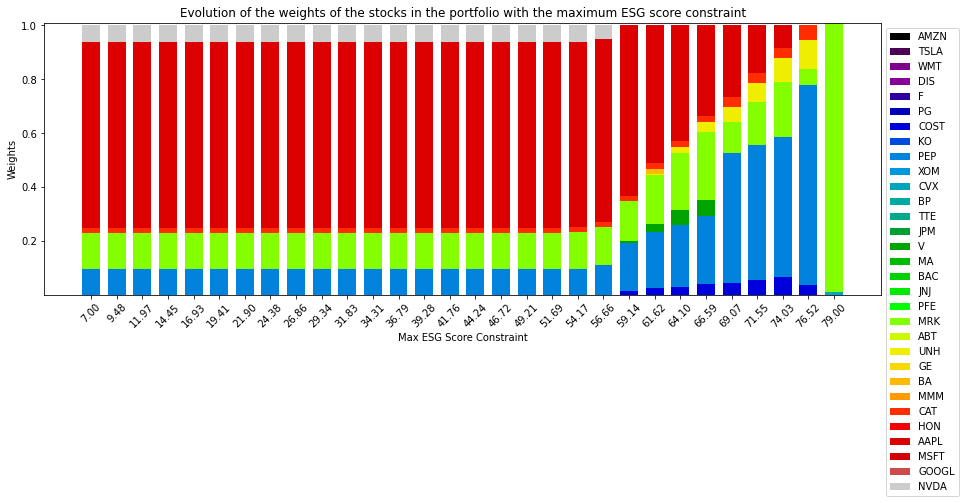

In [55]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=1,
                                 best_in_class_strategy='global')

PORTFOLIO_WITH_CONTROVERSE.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=1,
                                 best_in_class_strategy='global')

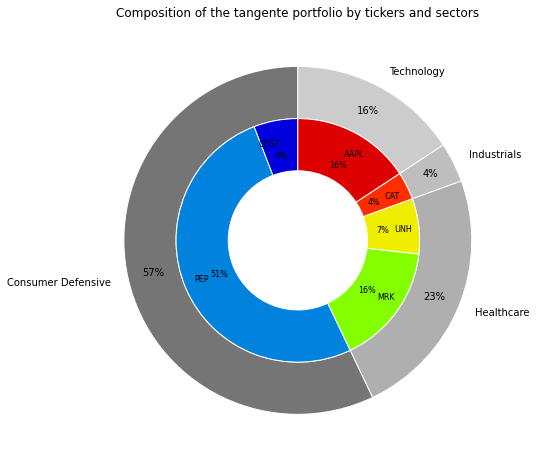

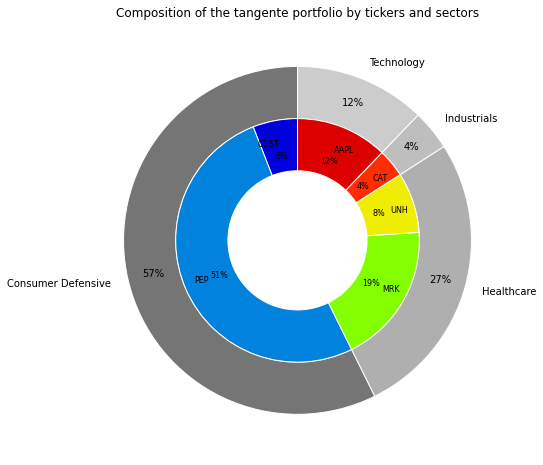

In [56]:
PORTFOLIO.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=1,
                                            best_in_class_strategy='global')

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=1,
                                            best_in_class_strategy='global')

## 1.2. Selection 50% best global scale

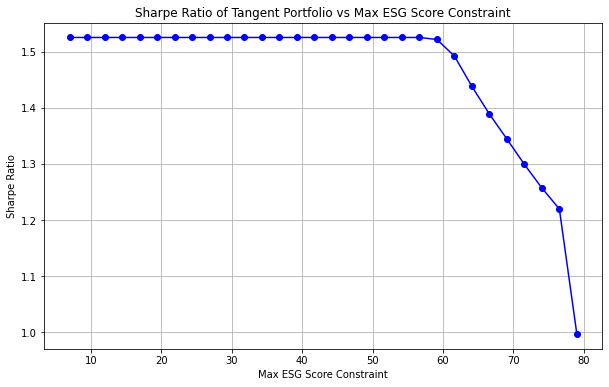

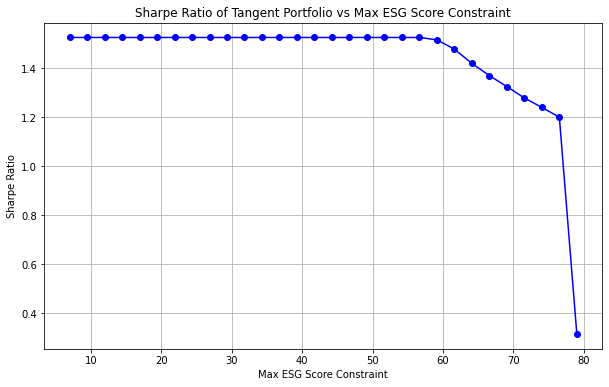

In [57]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.5,
                                        best_in_class_strategy='global')
                                        
PORTFOLIO_WITH_CONTROVERSE.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.5,
                                        best_in_class_strategy='global')


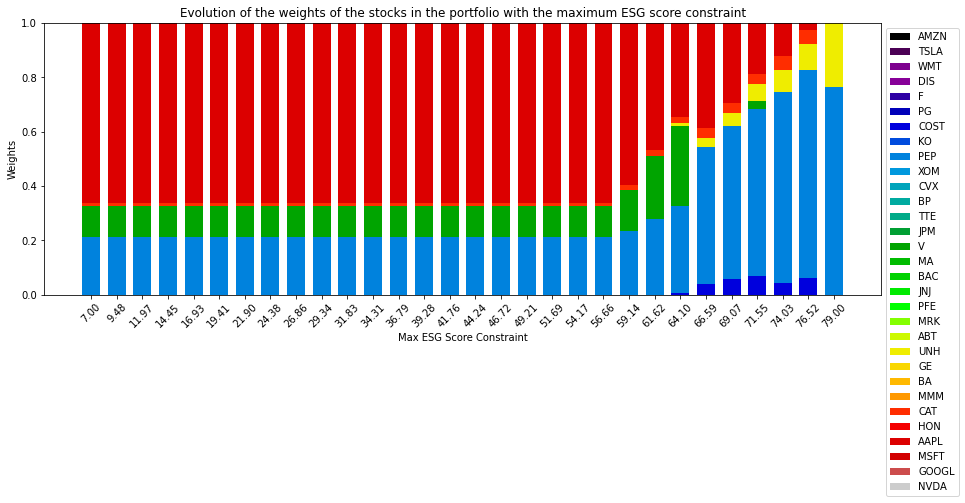

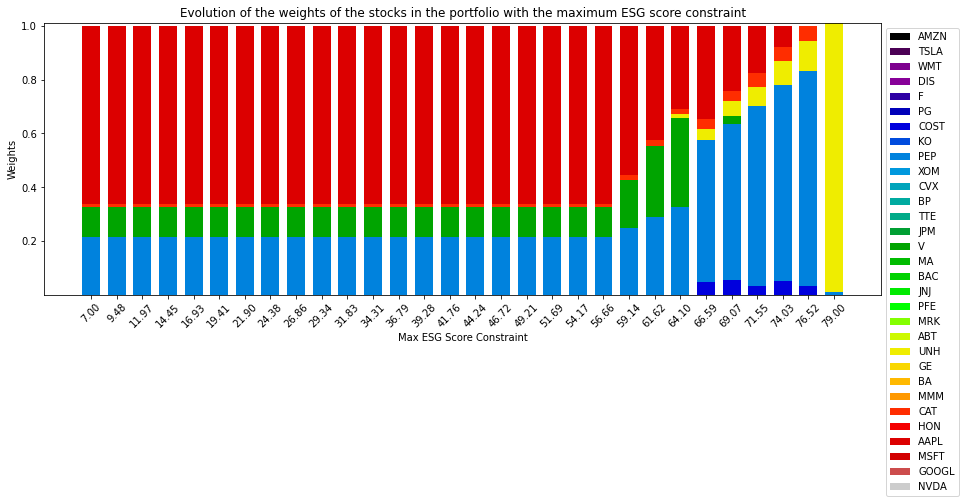

In [58]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.5,
                                 best_in_class_strategy='global')

PORTFOLIO_WITH_CONTROVERSE.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.5,
                                 best_in_class_strategy='global')

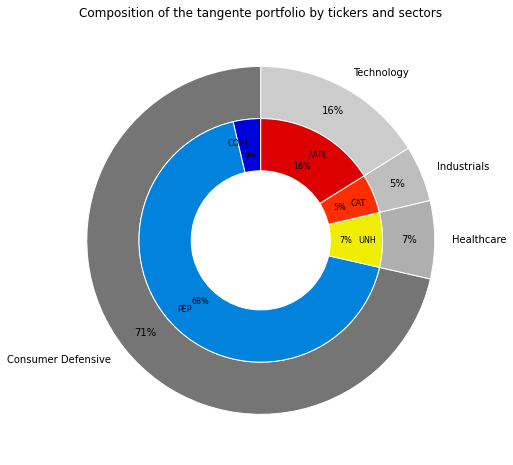

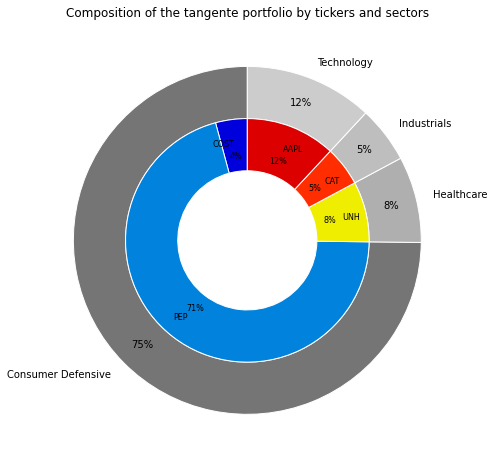

In [59]:
PORTFOLIO.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=0.5,
                                            best_in_class_strategy='global')

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=0.5,
                                            best_in_class_strategy='global')


## 1.3. Selection 50% best sector scale

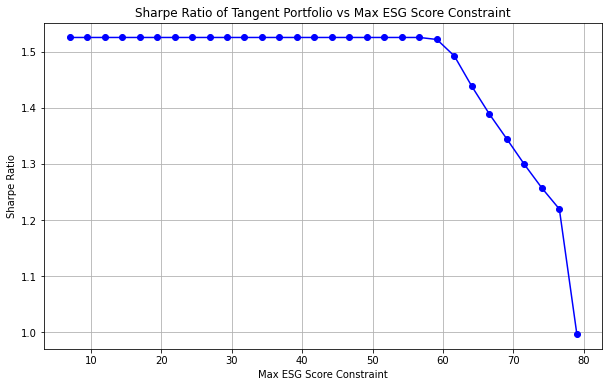

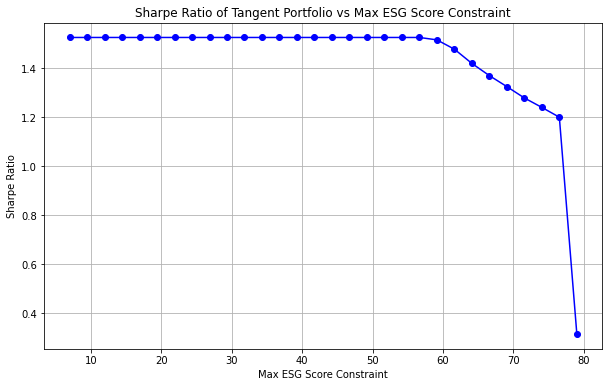

In [60]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.5,
                                        best_in_class_strategy='sector')

PORTFOLIO_WITH_CONTROVERSE.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.5,
                                        best_in_class_strategy='sector')


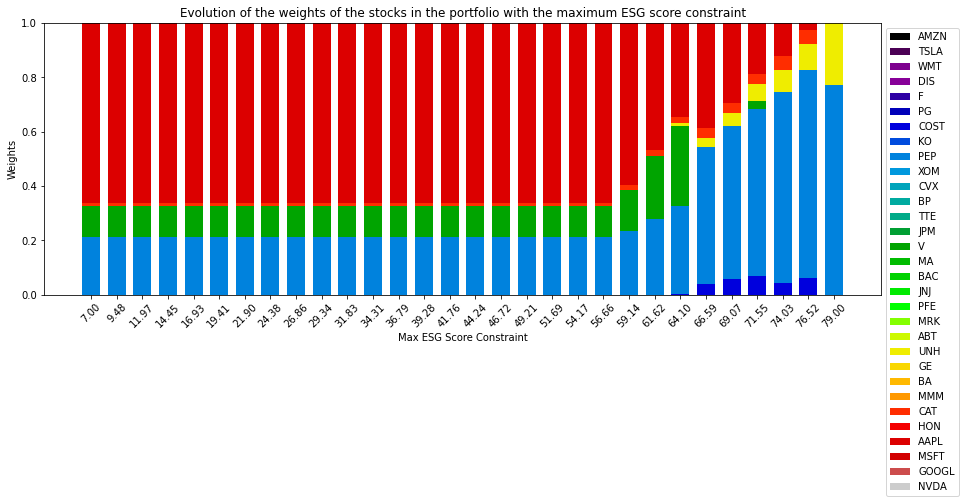

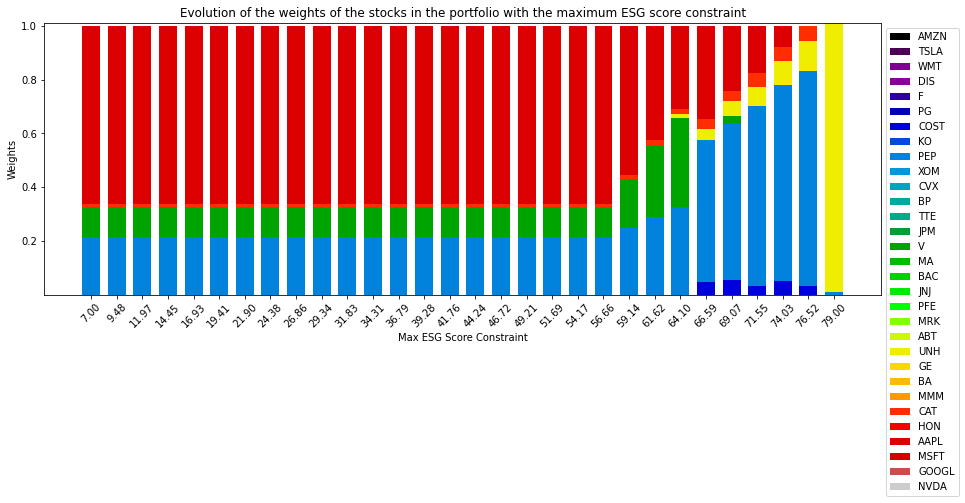

In [61]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.5,
                                 best_in_class_strategy='sector')

PORTFOLIO_WITH_CONTROVERSE.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.5,
                                 best_in_class_strategy='sector')


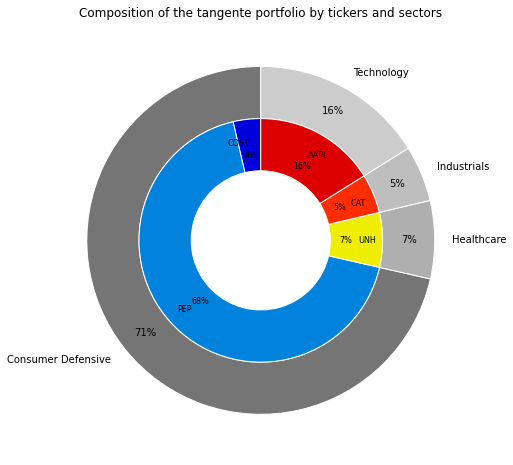

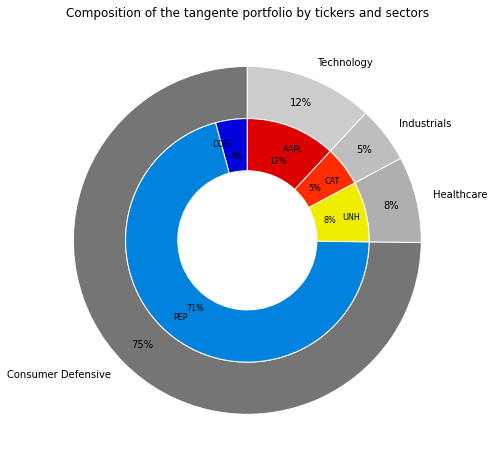

In [62]:
PORTFOLIO.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=0.5,
                                            best_in_class_strategy='sector')

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=0.5,
                                            best_in_class_strategy='sector')


## 1.4. Fixing lower bound on investment per sector

In [63]:
# Ne devrait pas marcher 
# SECTOR_MIN_WEIGHT_X_DICT_EQUAL_WEIGHTED = {sector_name: len(set(PORTFOLIO.get_sector_for_tickers().values())) 
#                                            for sector_name in set(PORTFOLIO.get_sector_for_tickers().values())}

SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS = {'Communication Services': 0.1,
                                      'Consumer Cyclical': 0,
                                      'Consumer Defensive': 0,
                                      'Energy': 0.3,
                                      'Financial Services': 0,
                                      'Healthcare': 0,
                                      'Industrials': 0,
                                      'Technology': 0}



### 1.4.1. Lower bound - Market optimum

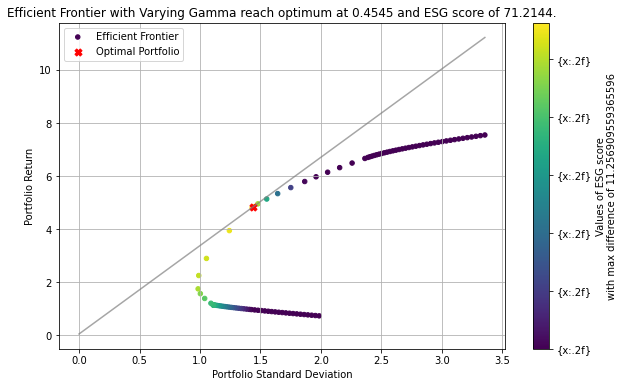

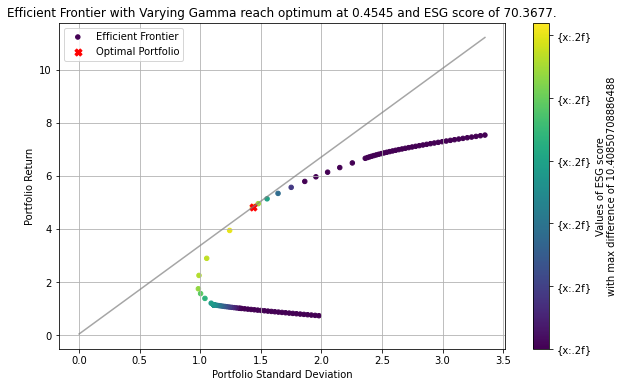

In [64]:
PORTFOLIO.plot_efficient_frontier(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True,
                                  sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_efficient_frontier(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True,
                                  sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

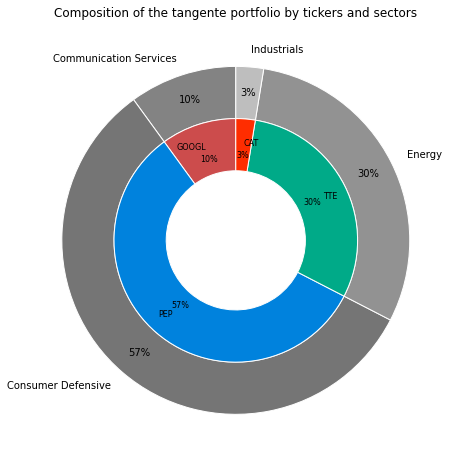

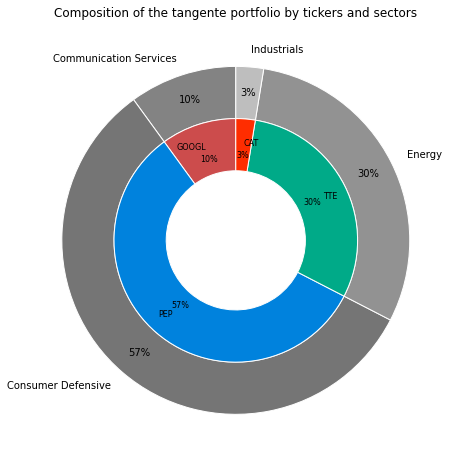

In [65]:
PORTFOLIO.plot_tangente_portfolio_composition(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True,
                                  sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True,
                                  sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

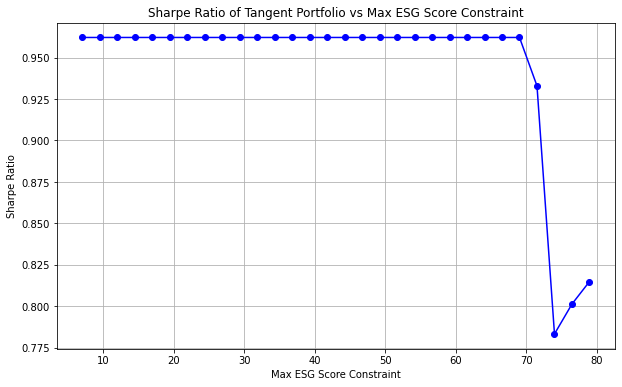

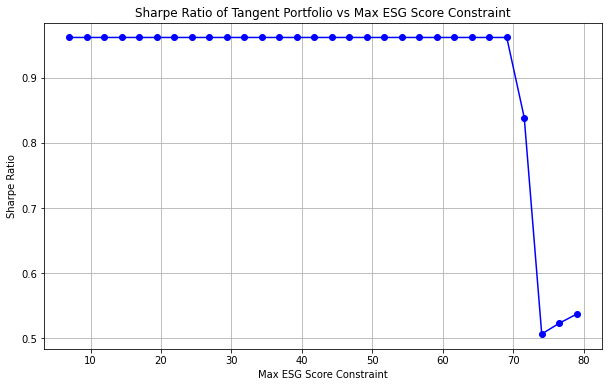

In [66]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=1,
                                        best_in_class_strategy='global',
                                        sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=1,
                                        best_in_class_strategy='global',
                                        sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)


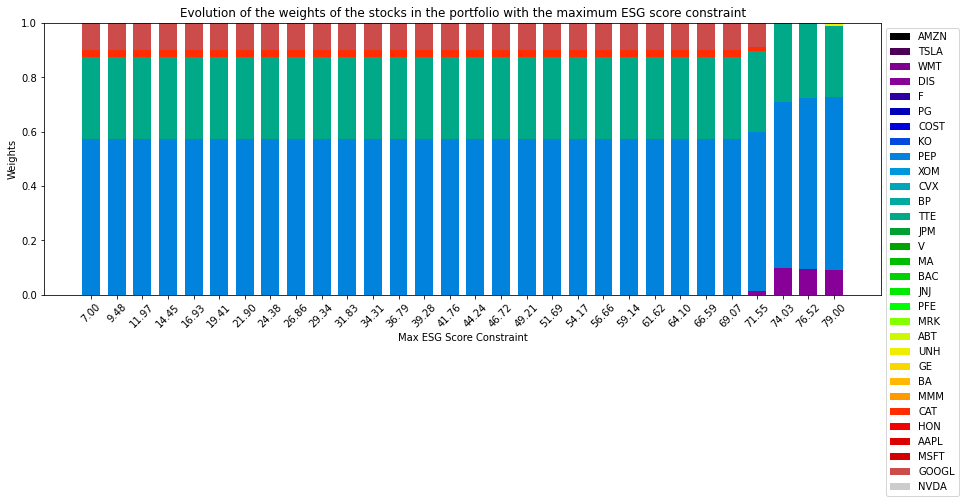

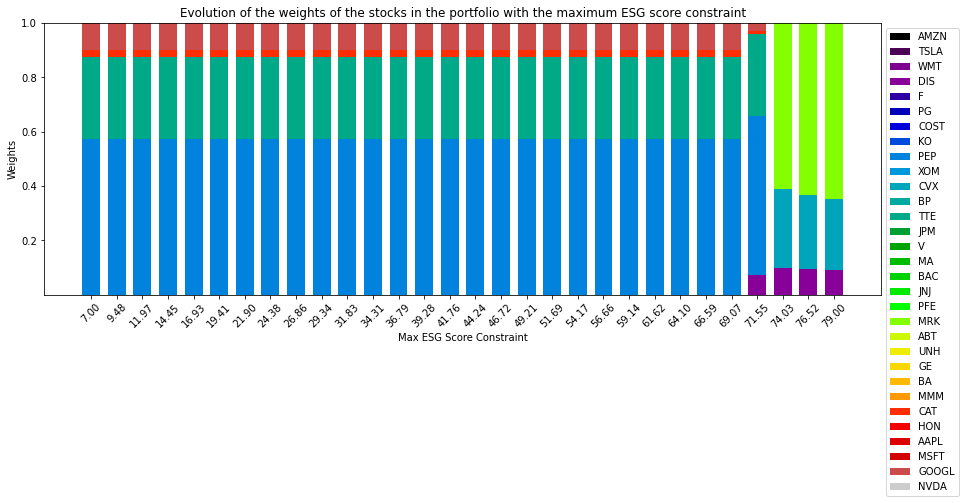

In [67]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=1,
                                 best_in_class_strategy='global',
                                 sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=1,
                                 best_in_class_strategy='global',
                                 sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)


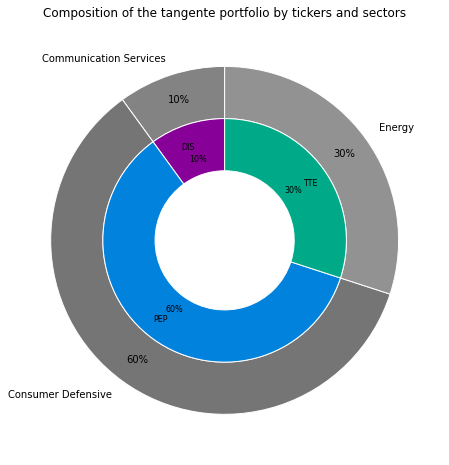

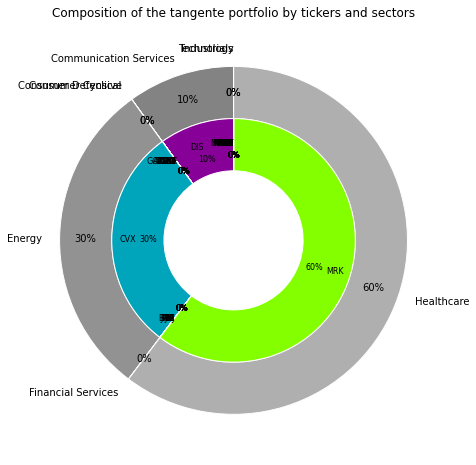

In [68]:
PORTFOLIO.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=1,
                                            best_in_class_strategy='global',
                                            sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=1,
                                            best_in_class_strategy='global',
                                            sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

### 1.4.2. Lower bound - 50% sector

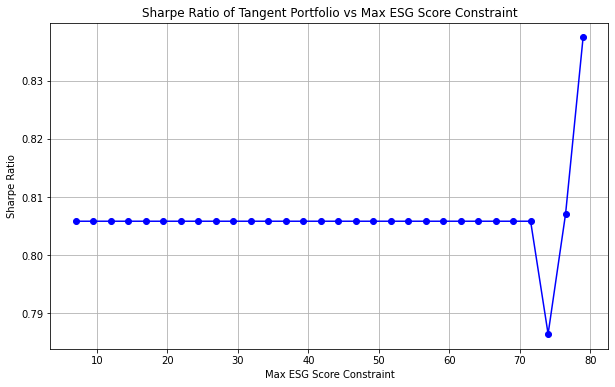

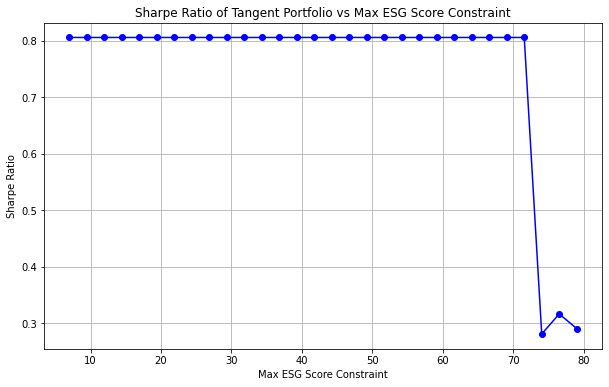

In [69]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.5,
                                        best_in_class_strategy='sector',
                                        sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.5,
                                        best_in_class_strategy='sector',
                                        sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)



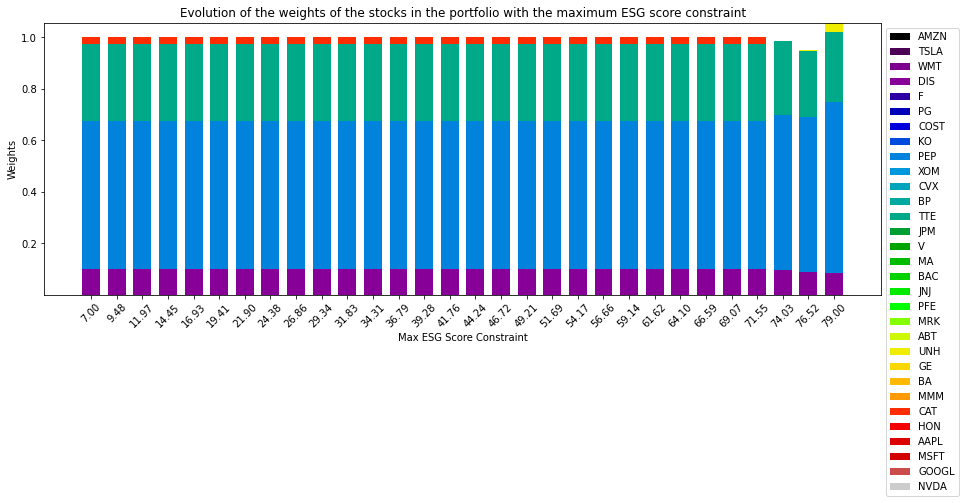

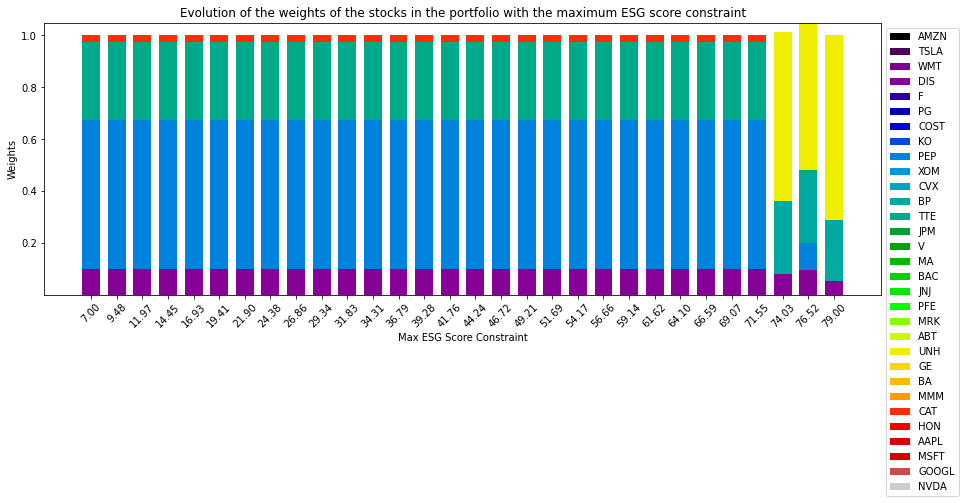

In [70]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.5,
                                 best_in_class_strategy='sector',
                                 sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.5,
                                 best_in_class_strategy='sector',
                                 sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)


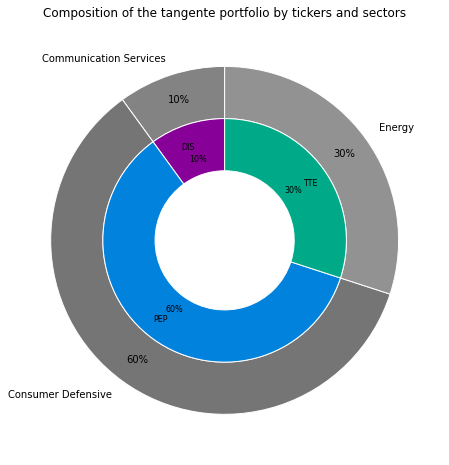

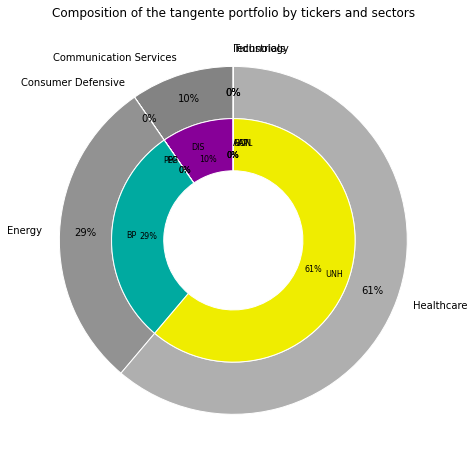

In [71]:
PORTFOLIO.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=0.5,
                                            best_in_class_strategy='sector',
                                            sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=0.5,
                                            best_in_class_strategy='sector',
                                            sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

# 2. Test portfolio performance on unseen data

In [72]:
def check_if_dates_are_correct(T0, T1, T2):
    if datetime.strptime(T1, '%Y-%m-%d') < get_first_date_with_all_msci_score_available(msci_score):
        print("ERROR: END_DATE is before the first date with all msci score available.")
        T1 = get_first_date_with_all_msci_score_available(msci_score)
        print(f"T1 is now {T1}, but you can change it.")
    else:
        print("Thanks for having entered a valid end date !")


def get_tangente_ptf_weights(T0, 
                             T1,
                             msci_score, 
                             TICKERS, 
                             INTERVAL, 
                             RISK_FREE_RATE, 
                             FREQUENCY_RETURNS, 
                             GAMMA_VALUES, 
                             min_esg_score,
                             fully_invested=True,
                             long_only=True,
                             best_in_class_method=1,
                             best_in_class_strategy='global',
                             sector_min_weight_x_dict=None):

    msci_last_esg_score = get_last_esg_scores(msci_score, T1)

    PTF = Portfolio(tickers=TICKERS,
                    start_date=T0,
                    end_date=T1,
                    interval=INTERVAL,
                    msci_data=msci_last_esg_score,
                    frequency_returns=FREQUENCY_RETURNS)
    
    PTF.download_data()

    PTF.get_optimal_portfolio_markowitz(gammas=GAMMA_VALUES, 
                                                  risk_free_rate=RISK_FREE_RATE,
                                                  max_esg_score=min_esg_score,
                                                  fully_invested=fully_invested,
                                                  long_only=long_only,
                                                  best_in_class_method=best_in_class_method,
                                                  best_in_class_strategy=best_in_class_strategy,
                                                  sector_min_weight_x_dict=sector_min_weight_x_dict)
    
    weights = PTF.weights_tangente_portfolio
    esg_score_tangent = PTF.score_esg_tangent
    

    return weights, esg_score_tangent

def test_tangente_ptf_weights(weights,
                              T1_bis,
                              T2,
                              msci_score,
                              TICKERS,
                              INTERVAL,
                              FREQUENCY_RETURNS):
    
    msci_last_esg_score = get_last_esg_scores(msci_score, T2)

    PTF = Portfolio(tickers=TICKERS,
                    start_date=T1_bis,
                    end_date=T2,
                    interval=INTERVAL,
                    msci_data=msci_last_esg_score,
                    frequency_returns=FREQUENCY_RETURNS)
    
    PTF.get_net_returns()

    return weights, PTF.net_returns, msci_last_esg_score


def get_tangent_ptf_evolution(T0, 
                              T1, 
                              T1_bis,
                              T2, 
                              msci_score, 
                              TICKERS, 
                              INTERVAL, 
                              RISK_FREE_RATE, 
                              FREQUENCY_RETURNS, 
                              GAMMA_VALUES, 
                              min_esg_score,
                              fully_invested=True,
                              long_only=True,
                              best_in_class_method=1,
                              best_in_class_strategy='global',
                              sector_min_weight_x_dict=None,
                              initial_value=None):
    
    weights, esg_score_tangent = get_tangente_ptf_weights(T0, 
                             T1,
                             msci_score, 
                             TICKERS, 
                             INTERVAL, 
                             RISK_FREE_RATE, 
                             FREQUENCY_RETURNS, 
                             GAMMA_VALUES, 
                             min_esg_score,
                             fully_invested,
                             long_only,
                             best_in_class_method,
                             best_in_class_strategy,
                             sector_min_weight_x_dict)
    
    weights, net_returns, msci_last_esg_score = test_tangente_ptf_weights(weights,
                                                                      T1_bis,
                                                                      T2,
                                                                      msci_score,
                                                                      TICKERS,
                                                                      INTERVAL,
                                                                      FREQUENCY_RETURNS)
                              


    # Calculate weighted returns
    weighted_returns = net_returns.dot(weights)

    # Calculate portfolio value
    portfolio_return = (1 + weighted_returns).prod()

    if initial_value is not None:
        portfolio_value = initial_value * portfolio_return
        print("Portfolio value:", portfolio_value)

    print("Portfolio return:", round(portfolio_return, 2))
    print("Portfolio esg score at T1:", esg_score_tangent)
    print("Portfolio esg score at T2:", np.array(msci_last_esg_score) @ weights)


In [73]:
T0='2020-01-01'
T1='2022-12-01'
T1_bis='2022-01-01'
T2='2023-12-01'

check_if_dates_are_correct(T0, T1, T2)

Thanks for having entered a valid end date !


In [74]:
get_tangent_ptf_evolution(T0, 
                              T1, 
                              T1_bis,
                              T2, 
                              msci_score, 
                              TICKERS, 
                              INTERVAL, 
                              RISK_FREE_RATE, 
                              FREQUENCY_RETURNS, 
                              GAMMA_VALUES, 
                              min_esg_score=70,
                              fully_invested=True,
                              long_only=True,
                              best_in_class_method=1,
                              best_in_class_strategy='global',
                              sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS,
                              initial_value=100)

[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
Portfolio value: -80.34584968712298
Portfolio return: -0.8
Portfolio esg score at T1: 71.21426224525072
Portfolio esg score at T2: 75.71426224525034


In [75]:
for max_score in list(np.linspace(65, np.max(msci_last_esg_score), 15)):
    print(f"Max score: {max_score}")
    get_tangent_ptf_evolution(T0, 
                            T1, 
                            T1_bis,
                            T2, 
                            msci_score, 
                            TICKERS, 
                            INTERVAL, 
                            RISK_FREE_RATE, 
                            FREQUENCY_RETURNS, 
                            GAMMA_VALUES, 
                            min_esg_score=max_score,
                            fully_invested=True,
                            long_only=True,
                            best_in_class_method=1,
                            best_in_class_strategy='global',
                            sector_min_weight_x_dict=None)

Max score: 65.0
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
Portfolio return: 124.02
Portfolio esg score at T1: 65.00000000000003
Portfolio esg score at T2: 61.503533751476155
Max score: 66.0
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
Portfolio return: 410.54
Portfolio esg score at T1: 66.00000000000016
Portfolio esg score at T2: 62.21520060802011
Max score: 67.0
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
Portfolio return: 1187.03
Portfolio esg score at T1: 67.00000000000018
Portfolio esg score at T2: 62.919425749524876
Max score: 68.0
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
Portfolio return: 65

In [ ]:
# get weights of tangent portfolio under desired constraints
# test allocation return, vol, (sharp ratio) and esg score Y months later

In [ ]:
#TODO

#2. Backtest analyses
# train l'optimisation entre T0 et T1 -> renvoie des weights
# test les weights sur la période T1 et T2 -> renvoie un score de performance + analyse de si on respecte encore les contraintes esg en T2 (moyenne, variance etc.)
# faire cela pour les différents cas précédement identifiés (1 global, 0.5 global, 0.5 local ET ajout ou non de contraintes sectorielles)

#3. comparer à Sustainalytics ajrd (interval de confiance sur le score ESG?)

# Récap: vérifier les contraintes au cours du temps (les plots) et comparer à des indices ou des ptf equal weights.
# Répéter l'allocation chaque année et comparer comment la frontière efficiente évolue au cours du temps

# Interval de confiance (±3sigma): voir les bornes de notre loi normale 


In [ ]:
import json

DICT = {'AMZN':30, 
#        'TSLA':25.3, 
#        'WMT':25.3, 
#        'DIS':15.7, 
#        'F':23.2, 
        'PG':27.9, 
        'COST':26.3, 
#        'KO':24.9, 
#        'PEP':22.1,
        'XOM':41.6, 
        'CVX':36.8,
        'BP':36.0, 
        'TTE':27.1, 
        'JPM':30.1, 
#        'V':16.4, 
#        'MA':16.6, 
        'BAC':28.3, 
#        'JNJ':23.9, 
#        'PFE':18.7, 
#        'MRK':22.1, 
#        'ABT':25.0, 
#        'UNH':15.3, 
        'GE':36.9, 
        'BA':39.4, 
        'MMM':41.0, 
        'CAT':36.3, 
        'HON':28.1, 
#        'AAPL':17.2, 
#        'MSFT':15.2, 
#        'GOOGL':24.1, 
#        'NVDA':13.5}
}

TICKERS=DICT.keys()
# Open the JSON file
with open('/Users/elbezaharon/PA3A project/msci_esg_ratings.json') as f:
    # Load the JSON data
    data = json.load(f)

# Print the data

df={}
for ticker in TICKERS:
    df[ticker]=data[ticker]['controversy_info']

df=pd.DataFrame(df)
mapping = {'Green': 1, 'Yellow': 2, 'Orange': 3}
df = df.replace(mapping)
controversy_scores,controversy_index=list(round(df.mean())),list(df.columns)
esg_df=pd.DataFrame(DICT.values(),index=TICKERS,columns=['Score'])
esg_df['controversy_scores']=controversy_scores

esg_df['gaussian variable']=esg_df.apply(lambda x : np.random.normal(x['Score'], np.sqrt(x['controversy_scores']), 20),axis=1)
esg_df[['simulation '+f'{i}' for i in range(1,21)]]=pd.DataFrame(esg_df['gaussian variable'].tolist(),index=esg_df.index)
esg_df=esg_df.drop(columns='gaussian variable')
esg_df

,Score,controversy_scores,simulation 1,simulation 2,simulation 3,simulation 4,simulation 5,simulation 6,simulation 7,simulation 8,...,simulation 11,simulation 12,simulation 13,simulation 14,simulation 15,simulation 16,simulation 17,simulation 18,simulation 19,simulation 20
AMZN,30.0,2.0,29.936219,30.089001,29.624999,30.338531,29.754019,29.203631,29.715082,29.588592,...,28.214729,31.403787,31.102504,29.095544,31.009640,31.413009,29.637166,31.221356,31.744025,28.674008
PG,27.9,3.0,28.762708,30.660897,28.815868,27.337503,27.163975,27.853227,28.470490,28.275507,...,29.107759,25.986371,27.685651,27.997541,26.730858,25.997105,29.708224,26.392564,26.615046,28.547028
COST,26.3,1.0,26.946937,26.399542,26.523335,27.719981,27.084928,25.477377,24.390523,24.939639,...,25.837146,27.359013,26.813167,25.610417,26.151211,27.149376,25.559672,25.455340,26.058227,25.145024
XOM,41.6,3.0,41.969192,41.532335,40.818103,43.197270,43.588341,39.888158,42.800382,42.096074,...,42.871196,42.284122,43.052758,43.423820,41.391541,40.366755,42.824476,43.134059,40.145926,42.327694
CVX,36.8,2.0,39.259094,36.160161,39.539240,36.370222,34.076743,36.243326,39.118922,35.618176,...,34.184931,36.166215,34.442180,39.212285,37.102137,34.941374,37.798970,37.301341,37.262986,37.014667
BP,36.0,2.0,36.066799,35.972191,35.408298,36.898689,38.885700,35.809908,39.328233,33.709614,...,39.326792,37.819813,36.445096,35.974382,34.850874,34.621251,34.103694,35.267886,33.935459,35.745274
TTE,27.1,2.0,28.285016,25.043724,28.382029,27.742123,27.484124,26.394626,24.657885,27.253458,...,27.311396,27.365812,25.499862,26.899282,27.688347,31.345121,29.622597,26.941526,26.890719,27.025731
JPM,30.1,2.0,29.027150,30.423785,30.914272,31.160190,29.449277,30.192742,29.973382,32.055113,...,33.245972,30.786517,29.051539,32.687229,30.567742,33.570763,26.514266,30.691134,30.449668,28.631247
BAC,28.3,2.0,29.718939,29.644132,28.080495,29.369572,27.669950,27.847120,30.391138,28.126613,...,29.077188,28.352638,29.267331,28.218613,27.921579,29.102156,27.928162,29.763134,29.007374,25.902179
GE,36.9,2.0,38.782327,34.468732,38.858342,37.407588,36.533245,36.453459,35.522013,37.785084,...,37.145126,37.356157,35.871930,35.334832,37.130022,36.124866,34.372995,39.214715,35.426615,37.288106


In [ ]:
esg_df[esg_df['Score']<22]

,Score,controversy_scores,simulation 1,simulation 2,simulation 3,simulation 4,simulation 5,simulation 6,simulation 7,simulation 8,...,simulation 11,simulation 12,simulation 13,simulation 14,simulation 15,simulation 16,simulation 17,simulation 18,simulation 19,simulation 20


<Figure size 720x720 with 0 Axes>

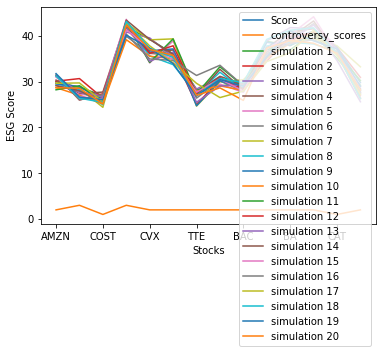

In [ ]:
plt.figure(figsize=(10,10))
esg_df.plot()
plt.xlabel('Stocks')
plt.ylabel('ESG Score')
plt.show()

In [ ]:
def get_sharpe_opti(ESG_SCORES):
    PORTFOLIO_BIG = Portfolio(list(TICKERS),
                            '2020-01-01',
                            '2024-01-01',
                            '1mo',
                            ESG_SCORES,
                            'Y')
    MAX_ESG_SCORE=40
    MAX_ESG_SCORES=list(np.linspace(np.min(ESG_SCORES), np.max(ESG_SCORES), 10))    # risk-free rate
    # Set gamma values
    GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter


    PORTFOLIO_BIG.download_data()

    # propostion of risk-free asset in the portfolio
    ALPHA = 0.9
    # risk-free rate
    RISK_FREE_RATE = 0.047

    PORTFOLIO_BIG.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                            ALPHA,
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_scores=MAX_ESG_SCORES,
                                            fully_invested=True,
                                            long_only=True)     
                                    
    # PORTFOLIO_BIG.get_pnl_backtest(GAMMA_VALUES,ALPHA,risk_free_rate=0,
    #                         max_esg_scores=[np.inf],
    #                         fully_invested=True,
    #                         long_only=True,best_in_class_method=False,
    #                         with_optimal_portfolio=False,
    #                         with_linear_tangent=False,opt_problem='Markowitz',with_esg_score=True,esg_scores=MAX_ESG_SCORES)
    
    return PORTFOLIO_BIG._sharpe_ratio_tangent,MAX_ESG_SCORES

In [ ]:

ESG_SCORES=esg_df['Score']
hist_sharpes,hist_esg_scores=get_sharpe_opti(ESG_SCORES)

[*********************100%%**********************]  14 of 14 completed


In [ ]:
max_by_esg_scores={}
for col in w.columns:
    max_by_esg_scores[col]=w[col].nlargest(5)

max_by_esg_scores

{'ESG_13.5': NVDA    1.000000e+00
 ABT     8.592518e-09
 KO      8.697197e-12
 F       5.981266e-12
 CAT     5.219208e-12
 Name: ESG_13.5, dtype: float64,
 'ESG_16.622222222222224': NVDA     0.623136
 ABT      0.187189
 UNH      0.154775
 MMM      0.018995
 GOOGL    0.015904
 Name: ESG_16.622222222222224, dtype: float64,
 'ESG_19.744444444444444': NVDA     5.145752e-01
 GOOGL    3.517215e-01
 ABT      1.225001e-01
 MMM      1.120312e-02
 DIS      1.335921e-14
 Name: ESG_19.744444444444444, dtype: float64,
 'ESG_22.866666666666667': NVDA     5.144319e-01
 GOOGL    3.518677e-01
 ABT      1.224993e-01
 MMM      1.120104e-02
 DIS      1.573850e-13
 Name: ESG_22.866666666666667, dtype: float64,
 'ESG_25.988888888888887': NVDA     5.144319e-01
 GOOGL    3.518677e-01
 ABT      1.224993e-01
 MMM      1.120104e-02
 PEP      8.229781e-15
 Name: ESG_25.988888888888887, dtype: float64,
 'ESG_29.11111111111111': NVDA     5.144319e-01
 GOOGL    3.518677e-01
 ABT      1.224993e-01
 MMM      1.120104e

In [ ]:
scores=pd.DataFrame(hist_sharpes,columns=['Score'],index=hist_esg_scores)
for i in range(1,21):
    ESG_SCORES=esg_df['simulation '+f'{i}']
    sharpes_1,esg_scores_1=get_sharpe_opti(ESG_SCORES)
    scores['simulation '+f'{i}']=sharpes_1



[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*****

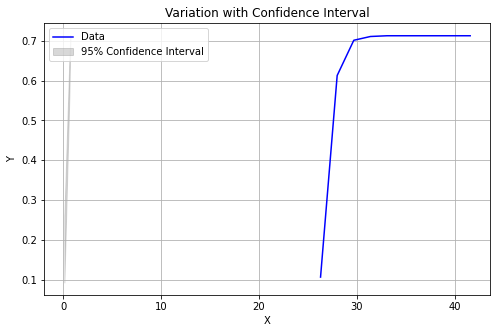

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df=scores
# Calculate upper and lower bounds for confidence interval
confidence_level = 0.95
z_score = 1.96  # For a 95% confidence interval (standard normal distribution)
y_lower = df.mean(axis=1) - z_score * (df.std(axis=1) / np.sqrt(len(df)))
y_upper = df.mean(axis=1) + z_score * (df.std(axis=1) / np.sqrt(len(df)))

# Plot with confidence interval
plt.figure(figsize=(8, 5))
plt.plot(df['Score'], color='b', label='Data')
plt.fill_between(df['Score'], y_lower, y_upper, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title('Variation with Confidence Interval')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Evolution of sharpe ratio in function of simulations')

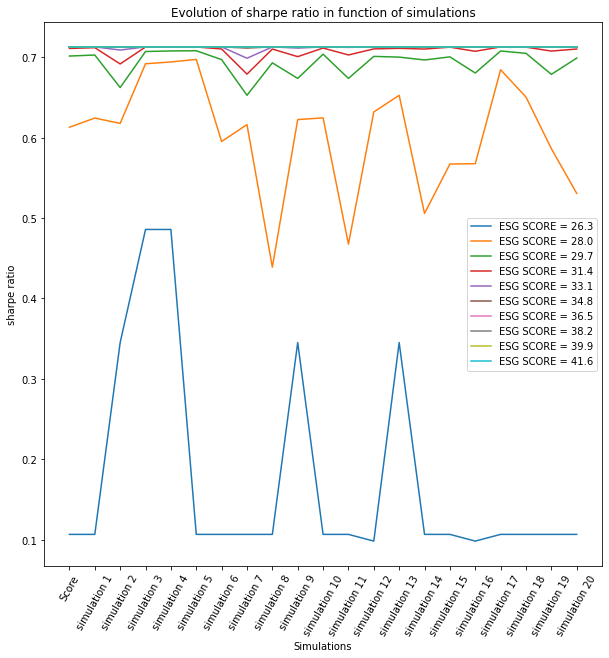

In [ ]:
df1=df.T
plt.figure(figsize=(10,10))
for col in df1.columns:
    sns.lineplot(data=df1,x=df1.index,y=df1[col],label='ESG SCORE = '+f'{round(col,3)}')
plt.xticks(rotation=60)
plt.xlabel('Simulations')
plt.ylabel('sharpe ratio')
plt.title('Evolution of sharpe ratio in function of simulations')


Il n'y a pas de place à la variation pour ce genre de ptf car on atteint très vite le portefeuille optimal


# ----